<a href="https://colab.research.google.com/github/MarcelodeFreitas/udemy_deep_learning_pytorch_python/blob/main/Projeto_2_Classifica%C3%A7%C3%A3o_bin%C3%A1ria_breast_cancer_com_valida%C3%A7%C3%A3o_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2: Classificação binária brest cancer com validação cruzada e dropout

## Etapa 1: Importação das bibliotecas

In [ ]:
!pip install skorch

     |████████████████████████████████| 155 kB 5.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
import skorch
from skorch import NeuralNetBinaryClassifier
import torch
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_val_score

In [ ]:
torch.__version__, skorch.__version__, sklearn.__version__

('1.10.0+cu111', '0.11.0', '1.0.1')

## Etapa 2: Base de dados

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


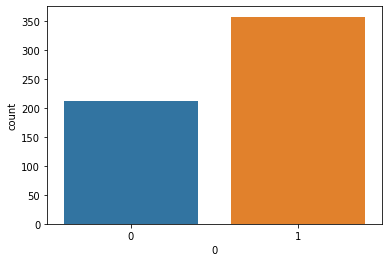

In [ ]:
sns.countplot(classe['0']);

In [ ]:
classe.shape

(569, 1)

In [ ]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [ ]:
classe.shape

(569,)

In [ ]:
type(previsores)

numpy.ndarray

In [ ]:
type(classe)

numpy.ndarray

## Etapa 3: Classe para estrutura da rede neural

** ATUALIZAÇÃO DEZ/2021 **: na versão atual do Skorch, os resultados da rede neural devem ser retornados sem ativação, ou seja, sem a camada sigmoide no final. Com isto, a função de custo deve ser `BCEWithLogitsLoss`.

In [ ]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    # self.output = nn.Sigmoid() ** ATUALIZAÇÃO (ver detalhes no texto acima) **

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dense2(X)
    # X = self.output(X) ** ATUALIZAÇÃO (ver detalhes no texto acima) **
    return X

## Etapa 4: Skorch

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss, # ** ATUALIZAÇÃO **
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

## Etapa 5: Validação cruzada

In [ ]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1   107325.7548  0.2649
      2    86254.6303  0.0721
      3    68469.2027  0.0825
      4    53957.7557  0.0818
      5    42087.0206  0.0764
      6    32326.2660  0.0769
      7    24257.5120  0.0798
      8    17518.0686  0.0757
      9    11790.4187  0.0853
     10     6781.5139  0.0781
     11     2218.8343  0.0759
     12      192.7413  0.0919
     13      166.0516  0.0752
     14      142.9409  0.0743
     15      125.7514  0.0794
     16      106.8138  0.0832
     17       91.1450  0.0797
     18       85.3341  0.0764
     19       73.7283  0.0776
     20       69.8900  0.0829
     21       52.9702  0.0774
     22       59.5451  0.0822
     23       50.3248  0.1024
     24       47.4435  0.0759
     25       46.8926  0.0785
     26       46.3667  0.0838
     27       51.4423  0.0748
     28       44.0096  0.0899
     29       40.9110  0.0787
     30       42.7534  0.0767
     31       41.2551  0.0772
     32   

In [ ]:
resultados.shape

(10,)

In [ ]:
resultados

array([0.75438596, 0.84210526, 0.8245614 , 0.9122807 , 0.9122807 ,
       0.85964912, 0.87719298, 0.8245614 , 0.77192982, 0.78571429])

In [ ]:
media = resultados.mean()
media

0.8364661654135338

In [ ]:
desvio = resultados.std()
desvio

0.052426051743756745

## Etapa 6: Dropout

In [ ]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dropout0 = nn.Dropout(0.2)
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    # self.output = nn.Sigmoid() ** ATUALIZAÇÃO **

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)
    X = self.dense2(X)
    # X = self.output(X) ** ATUALIZAÇÃO **
    return X

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss, # ** ATUALIZAÇÃO **
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

In [ ]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1    76826.3913  0.1024
      2    60939.8427  0.0854
      3    48414.3305  0.0846
      4    36653.4982  0.0811
      5    28375.0036  0.0909
      6    21817.1026  0.0893
      7    16252.4861  0.0860
      8    11266.8603  0.0886
      9     7430.2986  0.0885
     10     4148.7800  0.0814
     11     2851.8537  0.0931
     12     2349.3630  0.1026
     13     2574.3616  0.0867
     14     2280.8980  0.0869
     15     1909.6453  0.0822
     16     1792.1118  0.0810
     17     1636.7897  0.0874
     18     1475.0408  0.0880
     19     1628.6915  0.0914
     20     1758.2286  0.0804
     21     1512.2896  0.0823
     22     1185.2867  0.0947
     23     1009.3950  0.0815
     24     1060.6702  0.0903
     25     1212.9753  0.0809
     26      966.5796  0.0811
     27      882.4842  0.0828
     28      844.1321  0.0840
     29      831.6535  0.0857
     30      682.6996  0.0932
     31      725.7147  0.0952
     32   

In [ ]:
media = resultados.mean()
desvio = resultados.std()
media, desvio

(0.6102130325814535, 0.10632093614467122)

In [ ]:
resultados

array([0.68421053, 0.54385965, 0.59649123, 0.66666667, 0.64912281,
       0.61403509, 0.43859649, 0.63157895, 0.45614035, 0.82142857])